In [1]:
# library to use GAM
library(mgcv)

Loading required package: nlme

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.



In [2]:
# example of train data having 2 inputs
set.seed(123)                                       # for reproducibility
n  <- 100                                           # number of data point
x1 <- runif(n, -1, 1)                               # input 1
x2 <- runif(n, -1, 1)                               # input 2
y  <- 1 + x1**4 + x2**2 + x1*x2 + rnorm(n, 0, 0.1)  # output

In [3]:
# Hyper parameters, the bigger number of knots is, the more complex model is.
k1 <- 20 # Number of knots for input 1
k2 <- 30 # Number of knots for input 2

# Fit the model
model <- gam(y ~ s(x1, k = k1, bs = "ps", m = 4)       +          # linear combination of x1, x1^2, ...
                 s(x2, k = k2, bs = "ps", m = 5)       +          # linear combination of x2, x2^2, ...
                 te(x1, x2, bs = c("ps", "ps"), m = 2),           # linear combination of x1x2, x1^2x2, x1x2^2, ...
                 method = "ML")                                   # using Maximum Likelihood for training

In [4]:
summary(model)


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x1, k = k1, bs = "ps", m = 4) + s(x2, k = k2, bs = "ps", 
    m = 5) + te(x1, x2, bs = c("ps", "ps"), m = 2)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.424069   0.009594   148.4   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
            edf Ref.df      F p-value    
s(x1)      4.34  4.732 35.373  <2e-16 ***
s(x2)      4.00  4.000  0.661   0.621    
te(x1,x2) 10.07 18.000 40.317  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.952   Deviance explained = 96.1%
-ML = -68.297  Scale est. = 0.0092041  n = 100

In [5]:
# Predict y wrt new input
new_x1 = runif(17, -1, 1)
new_x2 = runif(17, -1, 1)
pred_y <- predict(model, newdata = data.frame(x1 = new_x1, x2 = new_x2))

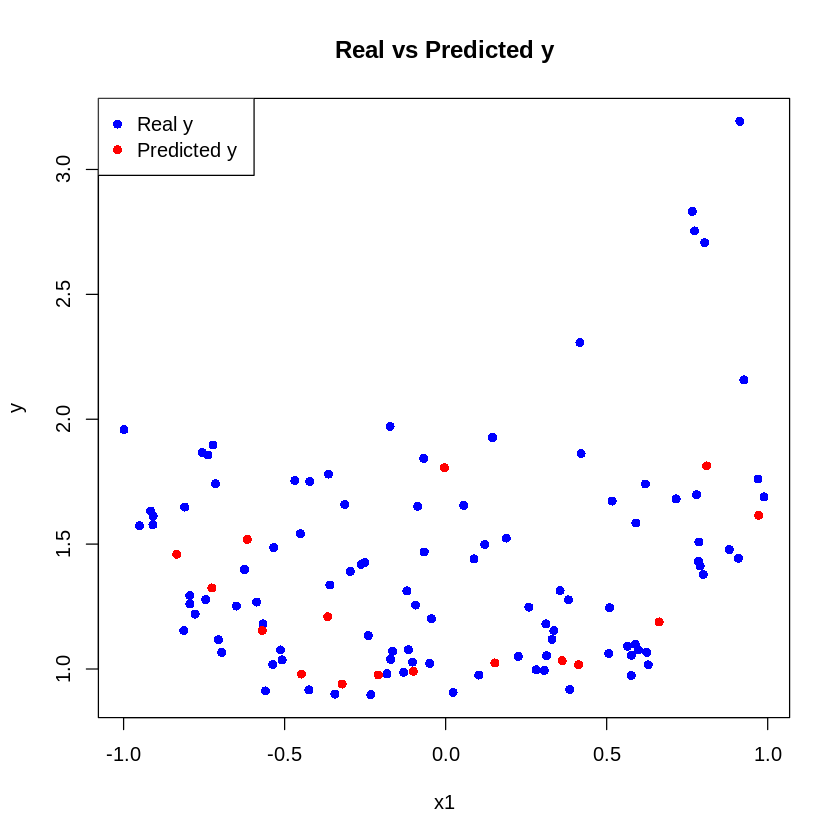

In [6]:
# Scatter plot of real y vs predicted y with respect to x1
plot(x1, y, col = "blue", pch = 16, xlab = "x1", ylab = "y", main = "Real vs Predicted y")
points(new_x1, pred_y, col = "red", pch = 16)
legend("topleft", legend = c("Real y", "Predicted y"), col = c("blue", "red"), pch = 16)

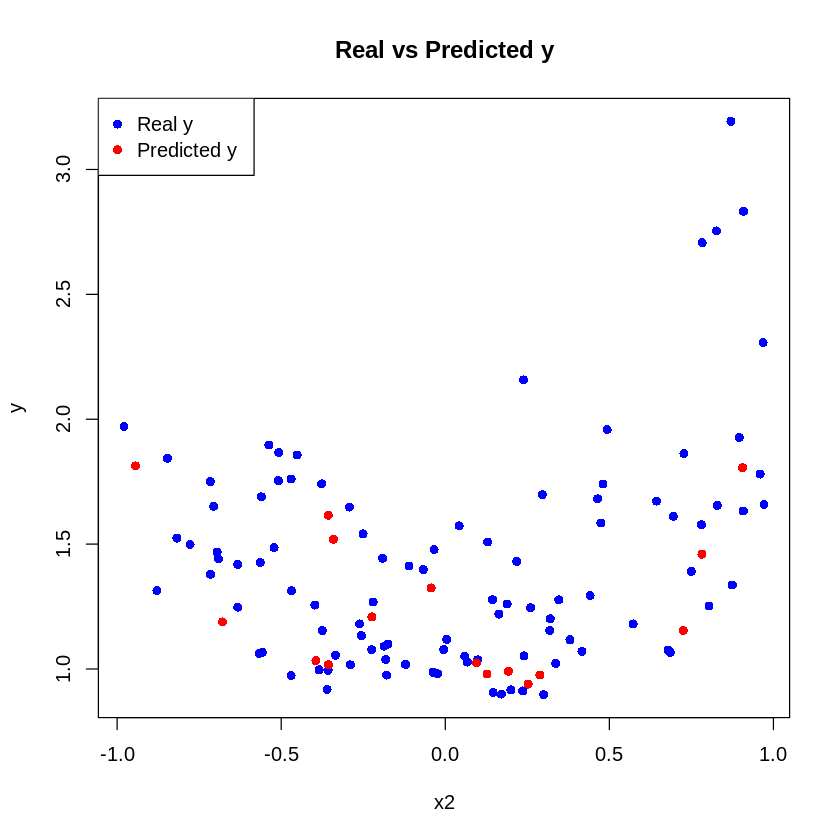

In [7]:
# Scatter plot of real y vs predicted y with respect to x2
plot(x2, y, col = "blue", pch = 16, xlab = "x2", ylab = "y", main = "Real vs Predicted y")
points(new_x2, pred_y, col = "red", pch = 16)
legend("topleft", legend = c("Real y", "Predicted y"), col = c("blue", "red"), pch = 16)